In [63]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LassoCV,RidgeCV
from scipy.stats import ttest_ind, levene
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold,ShuffleSplit,cross_val_score,RepeatedKFold
import warnings
from sklearn.tree import DecisionTreeClassifier
warnings.filterwarnings("ignore")

from sklearn.feature_selection import SelectFromModel

In [64]:
data_LA = pd.read_csv("input/LA_total.csv",index_col=0)
data_XA = pd.read_csv("input/XA_total.csv",index_col=0)


data_LA_ = pd.DataFrame()
columns_LA = data_LA.columns
for col in columns_LA:
    try:
        df = data_LA[col].astype(np.float64)
        data_LA_ = pd.concat([data_LA_,df],axis=1)
    except:
        pass
    continue
    
data_XA_ = pd.DataFrame()
columns_XA = data_XA.columns
for col in columns_XA:
    try:
        df = data_XA[col].astype(np.float64)
        data_XA_ = pd.concat([data_XA_,df],axis=1)
    except:
        pass
    continue

# 方差齐性
index_ = []
for col in data_LA_.columns:
    if levene(data_LA_[col],data_XA_[col])[1] > 0.05:
        if ttest_ind(data_LA_[col],data_XA_[col])[1] < 0.05:
            index_.append(col)
    else:
        if ttest_ind(data_LA_[col],data_XA_[col],equal_var=False)[1] < 0.05:
            index_.append(col)


data_L_T = data_LA_[index_]
data_X_T = data_XA_[index_]

In [65]:
data = pd.concat([data_L_T,data_X_T])
data = shuffle(data)
data

,MVI,diagnosticsImage-originalMean,diagnosticsImage-originalMinimum,diagnosticsMask-originalVoxelNum,originalshapeFlatness,originalshapeLeastAxisLength,originalshapeMaximum2DDiameterRow,originalshapeMaximum2DDiameterSlice,originalshapeMeshVolume,originalshapeMinorAxisLength,...,wavelet-LLLglszmGrayLevelNonUniformity,wavelet-LLLglszmLowGrayLevelZoneEmphasis,wavelet-LLLglszmSizeZoneNonUniformity,wavelet-LLLglszmSizeZoneNonUniformityNormalized,wavelet-LLLglszmSmallAreaEmphasis,wavelet-LLLglszmZoneEntropy,wavelet-LLLglszmZonePercentage,wavelet-LLLngtdmCoarseness,wavelet-LLLngtdmContrast,wavelet-LLLngtdmStrength
X19-1,1.0,-585.181628,-1024.0,71.0,0.000000,0.000000,9.105060,12.654759,255.878629,4.422720,...,2.720000,0.060102,27.880000,0.557600,0.774689,4.813661,0.704225,0.164622,0.223121,36.216280
X9,1.0,-547.092129,-1024.0,380.0,0.454595,7.835145,21.224320,16.322570,1416.078392,13.758645,...,8.823204,0.023080,60.889503,0.336406,0.590477,6.042421,0.476316,0.028226,0.211781,10.460162
X69,1.0,-461.711681,-1024.0,221.0,0.000000,0.000000,11.977500,13.110842,675.144063,9.008776,...,8.252033,0.029554,55.357724,0.450063,0.696604,5.243646,0.556561,0.053686,0.113252,7.985369
L49,0.0,-673.252977,-1024.0,744.0,0.419852,11.472456,27.855018,23.247696,3212.460892,15.520710,...,15.209581,0.009899,103.443114,0.309710,0.561415,6.298495,0.448925,0.006342,0.462567,1.879428
L40,0.0,-624.968738,-1024.0,8495.0,0.690239,30.309327,50.484240,50.343351,32850.814680,36.816498,...,120.788119,0.015398,277.718812,0.274969,0.535366,5.715910,0.118893,0.000889,0.029502,0.069178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X3,1.0,-493.770864,-1024.0,341.0,0.421506,8.462664,24.965288,11.442280,1245.291667,10.820578,...,9.123077,0.015620,43.876923,0.337515,0.597167,5.685717,0.381232,0.016611,0.243355,7.384377
L22,0.0,-661.499350,-1024.0,1603.0,0.333941,15.412770,41.334418,25.831435,6961.500950,18.503251,...,27.245353,0.015245,71.193309,0.264659,0.525345,5.745960,0.167810,0.004932,0.025975,0.759597
L35,0.0,-590.996050,-1024.0,1885.0,0.567642,17.480034,31.824932,34.239088,7708.781387,22.177547,...,27.328657,0.005205,158.450902,0.317537,0.580434,6.494470,0.264721,0.003280,0.112960,2.505126
X80,1.0,-625.068804,-1024.0,683.0,0.439346,9.911595,26.307639,23.485007,3172.682922,19.637370,...,22.210762,0.013488,71.905830,0.322448,0.585307,5.486505,0.326501,0.011475,0.046006,1.498532


In [66]:
target = data.iloc[:, 0]
features = data.iloc[:,1:]

features
target.nunique()

2

In [67]:
transfer = StandardScaler()
features_SS = transfer.fit_transform(features)

features_SS = pd.DataFrame(features_SS)
features_SS

,0,1,2,3,4,5,6,7,8,9,...,449,450,451,452,453,454,455,456,457,458
0,0.388247,0.362143,-0.661155,-1.917601,-1.574470,-1.375329,-0.879994,-0.613458,-1.404939,-0.372997,...,-0.739044,0.890568,-0.593919,1.268144,1.409896,-1.135794,1.508586,1.820057,-0.065223,1.658097
1,0.645600,0.362143,-0.541629,0.368495,-0.538765,-0.622530,-0.634294,-0.509783,-0.447373,0.940745,...,-0.586285,-0.089858,-0.410833,-0.321015,-0.320647,0.575967,0.395543,-0.134150,-0.088054,0.077071
2,1.222476,0.362143,-0.603133,-1.917601,-1.574470,-1.196905,-0.849442,-0.575993,-0.934557,2.120567,...,-0.600581,0.081596,-0.441515,0.495547,0.676348,-0.536791,0.787437,0.230628,-0.286410,-0.074843
3,-0.206809,0.362143,-0.400828,0.193778,-0.057959,-0.210658,-0.170392,-0.349259,-0.266642,0.538362,...,-0.426439,-0.438903,-0.174812,-0.512813,-0.593661,0.932698,0.261773,-0.447688,0.416827,-0.449653
4,0.119425,0.362143,2.597382,1.553514,2.432034,1.194976,1.644696,2.299216,1.917623,0.575541,...,2.216115,-0.293276,0.791798,-0.762407,-0.838378,0.121111,-1.350004,-0.525807,-0.455014,-0.560775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,1.005867,0.362143,-0.556715,0.202092,-0.455815,-0.390157,-0.961215,-0.525045,-0.748724,0.804878,...,-0.578780,-0.287404,-0.505193,-0.313050,-0.257799,0.079050,-0.068820,-0.300561,-0.024489,-0.111735
134,-0.127395,0.362143,-0.068553,-0.238259,0.462900,0.626627,0.002688,-0.014246,0.039271,-0.865169,...,-0.125192,-0.297325,-0.353684,-0.836479,-0.932518,0.162972,-1.111108,-0.467890,-0.462115,-0.518393
135,0.348962,0.362143,0.040529,0.936993,0.736166,0.035936,0.565901,0.052531,0.416136,0.404704,...,-0.123107,-0.563218,0.130285,-0.456581,-0.414992,1.205706,-0.637822,-0.491555,-0.286997,-0.411245
136,0.118749,0.362143,-0.424424,0.291811,-0.264285,-0.306775,-0.154495,-0.352813,0.155596,0.484789,...,-0.251204,-0.343860,-0.349732,-0.421299,-0.369216,-0.198468,-0.336110,-0.374139,-0.421789,-0.473034


In [68]:

# alphas_ = np.logspace(-2,0,300)


# lassocv = LassoCV(alphas = alphas_,cv = 10,max_iter = 100000)
# sfm = SelectFromModel(lassocv)
# sfm.fit_transform(features_SS, target)
# # features = features[features.columns[lassocv.coef_!=0]]
# # print(len(features.columns))
# selected_features = sfm.get_support(indices=True)
# print("Selected features:", selected_features)
# all_features = [f'Feature_{i+1}' for i in range(selected_features.shape[1])]
# # features_SS =features_SS[:, pd.DataFrame(features_SS).columns[lassocv.coef_!=0]]
# all_features.shape


In [69]:
features_SS.shape

(138, 459)

In [70]:
# # 

# # 初始化 RidgeCV 模型，指定一组 alpha 值
# alphas_ = np.logspace(-2,0,300)
# ridge_cv = RidgeCV(alphas=alphas_)

# # 使用 SelectFromModel 进行特征选择
# sfm = SelectFromModel(ridge_cv)
# sfm.fit(features_SS, target)



In [71]:
# # # 获取选择的特征索引
# selected_features = sfm.get_support(indices=True)

# # 打印选择的特征索引
# print("Selected features indices:", selected_features)
# features_SS = pd.DataFrame(features_SS).iloc[:, selected_features]

# features_SS.shape

In [72]:
lda = LinearDiscriminantAnalysis(n_components=1)

In [73]:
features_lda = lda.fit_transform(features_SS,target)

In [74]:
features_lda.shape

(138, 1)

In [75]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_target, test_target = train_test_split(
    features_lda, target, 
    test_size = 0.3)

In [76]:
train_features.shape

(96, 1)

In [77]:
test_features.shape

(42, 1)

In [78]:
#邏輯回歸
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(penalty='l2',max_iter = 10000,n_jobs=-1,solver='liblinear')

log.fit(train_features, train_target)


test_predict = log.predict(test_features)
# print(test_target)
# print(test_predict)
log.score(test_features,test_target)

0.9285714285714286

In [79]:
log.predict(test_features)
rkf=RepeatedKFold(n_splits=10,n_repeats=10)
sum_score = 0

for train_index, test_index in rkf.split(features_lda):
    X_train =pd.DataFrame(features_lda).iloc[train_index]
    X_test =pd.DataFrame(features_lda).iloc[test_index]
    y_train =pd.DataFrame(target).iloc[train_index]
    y_test =pd.DataFrame(target).iloc[test_index]
    model_ = log.fit(X_train,y_train)
    score_=model_.score(X_test,y_test)
    sum_score+=score_
    
print(sum_score/100)

0.945


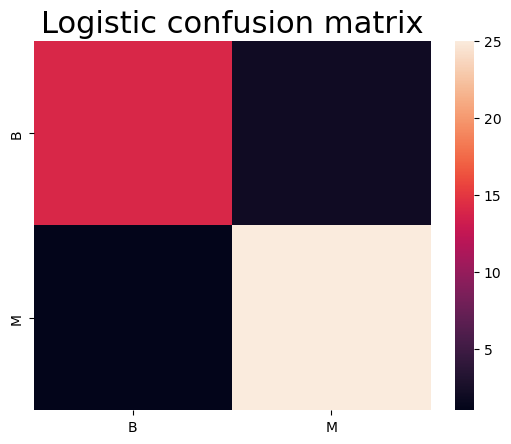

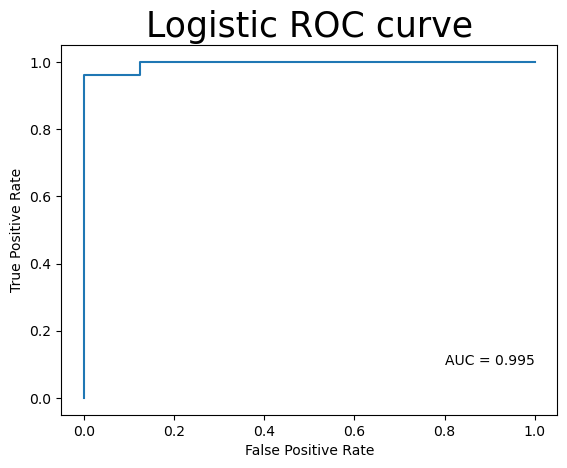

In [80]:
from sklearn.metrics import confusion_matrix, roc_curve,accuracy_score
import matplotlib.pyplot as plt
from sklearn import metrics
accuracy_score(test_target,test_predict)
confusion_matrix(test_target,test_predict)
import seaborn as sns
sns.heatmap(confusion_matrix(test_target,test_predict),
           xticklabels=['B','M'],
           yticklabels=['B','M'])
plt.title('Logistic confusion matrix',fontsize=22)
y_score = log.decision_function(test_features)
fpr, tpr, thresholds = roc_curve(test_target, y_score)

plt.figure()
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic ROC curve',fontsize=25)
plt.text(0.8,0.1, 'AUC = '+str('%.3f' % metrics.auc(fpr, tpr)))    #文本中注释
plt.show()






In [81]:
tree_clf = DecisionTreeClassifier()

In [82]:
tree_clf.fit(train_features, train_target)
train_features.shape

(96, 1)

In [83]:
test_predict = tree_clf.predict(test_features)
test_predict

array([1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0.,
       1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1.,
       1., 1., 1., 1., 0., 1., 0., 0.])

In [84]:
tree_clf.score(test_features,test_target)

rkf=RepeatedKFold(n_splits=10,n_repeats=10)
sum_score = 0

for train_index, test_index in rkf.split(features_lda):
    X_train =pd.DataFrame(features_lda).iloc[train_index]
    X_test =pd.DataFrame(features_lda).iloc[test_index]
    y_train =pd.DataFrame(target).iloc[train_index]
    y_test =pd.DataFrame(target).iloc[test_index]
    model_ = tree_clf.fit(X_train,y_train)
    score_=model_.score(X_test,y_test)
    sum_score+=score_
    
print(sum_score/100)

0.9274175824175829


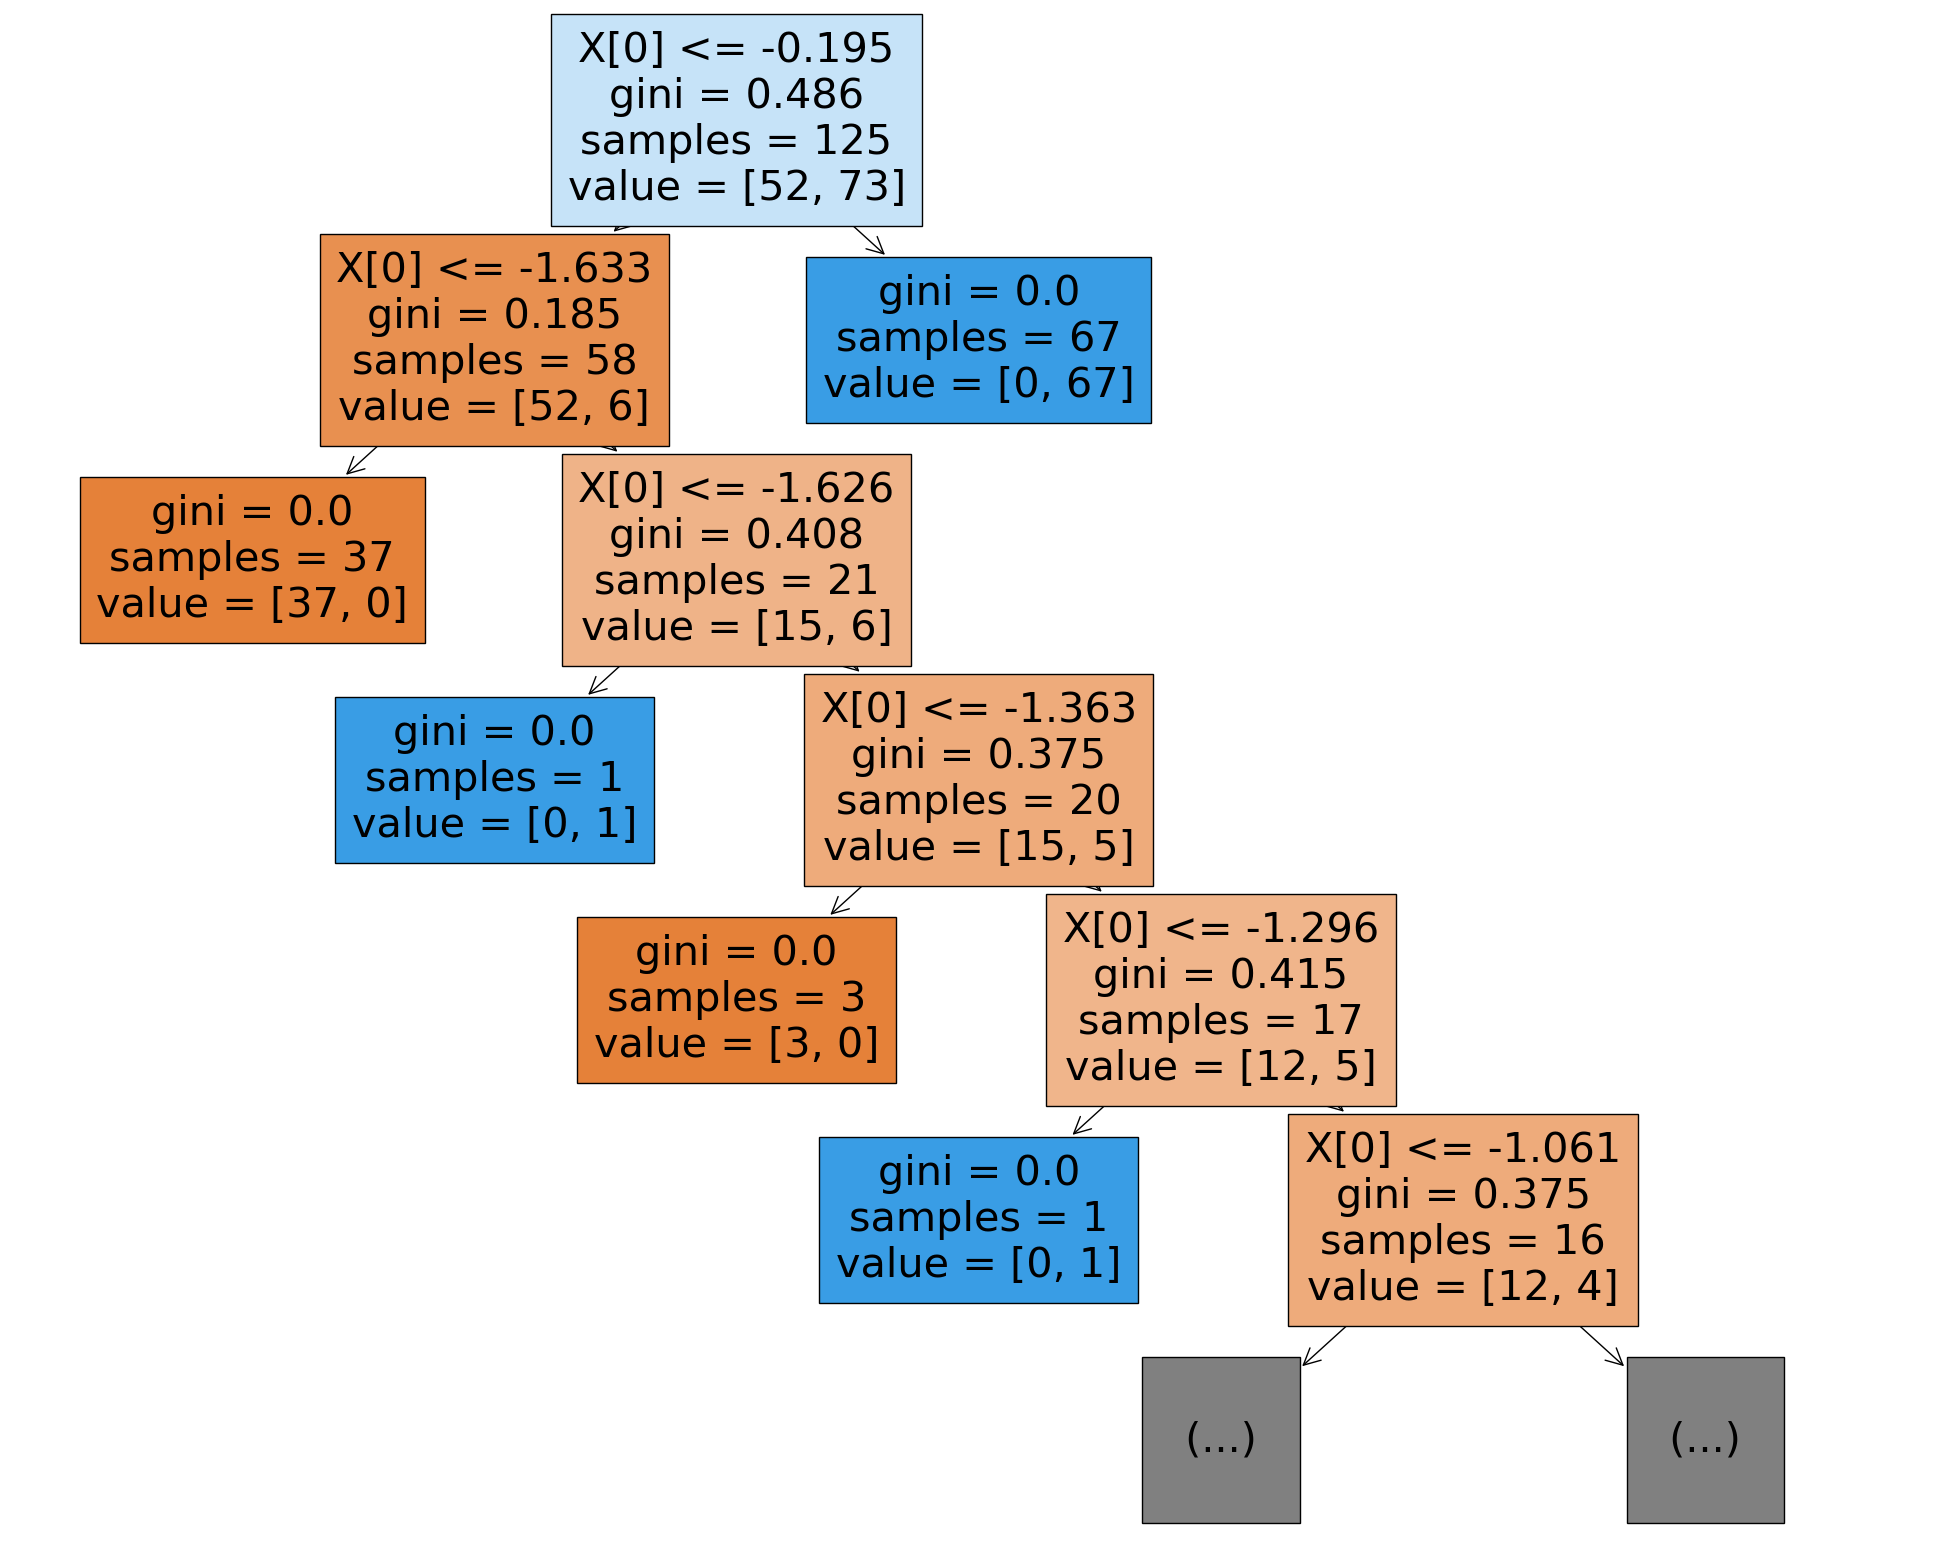

In [85]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
# plot_tree(tree_clf) 
# print(features_lda)
fig = plt.figure(figsize=(25,20))
_ = plot_tree(
    tree_clf,
    filled=True,
    max_depth=5
)


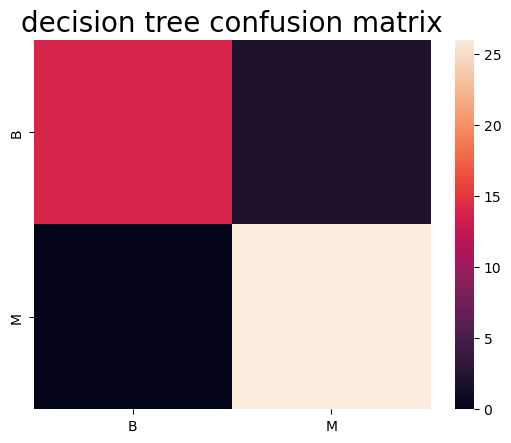

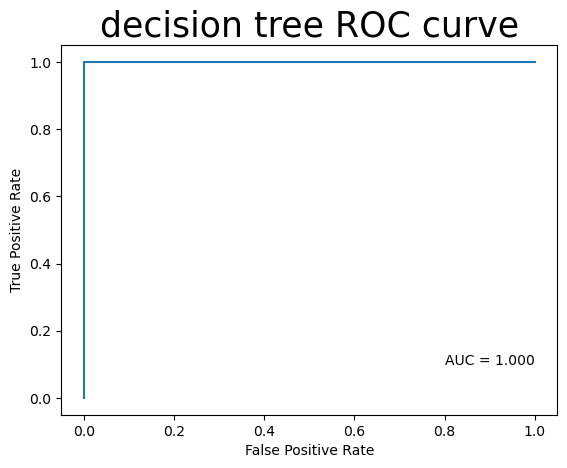

1.0

In [86]:
from sklearn.metrics import roc_auc_score as AUC
from sklearn.metrics import roc_curve

FPR, recall, thresholds = roc_curve(test_target,tree_clf.predict_proba(test_features)[:,1])
import seaborn as sns
sns.heatmap(confusion_matrix(test_target,test_predict),
           xticklabels=['B','M'],
           yticklabels=['B','M'])
plt.title('decision tree confusion matrix',fontsize=20)
# 0.9696400000000001

# 画出ROC曲线

plt.figure()
plt.plot(FPR, recall)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('decision tree ROC curve',fontsize=25)
plt.text(0.8,0.1, 'AUC = '+str('%.3f' % metrics.auc(FPR, recall)))    #文本中注释
plt.show()


from sklearn import metrics
metrics.auc(FPR, recall)

In [97]:
#randomForest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 20)
model_rf = model.fit(train_features,train_target)
score_rf = model_rf.score(test_features,test_target)
print(score_rf)

0.9523809523809523


In [91]:
model_rf.predict(test_features)

rkf=RepeatedKFold(n_splits=10,n_repeats=10)
sum_score = 0

for train_index, test_index in rkf.split(features_lda):
    X_train =pd.DataFrame(features_lda).iloc[train_index]
    X_test =pd.DataFrame(features_lda).iloc[test_index]
    y_train =pd.DataFrame(target).iloc[train_index]
    y_test =pd.DataFrame(target).iloc[test_index]
    model_ = model_rf.fit(X_train,y_train)
    score_=model_.score(X_test,y_test)
    sum_score+=score_
print('交叉')
print(sum_score/100)

交叉
0.9257692307692309


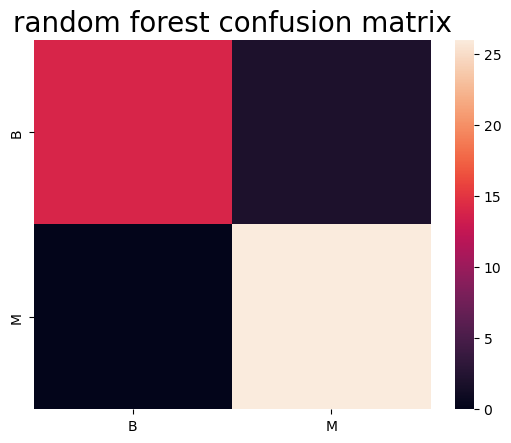

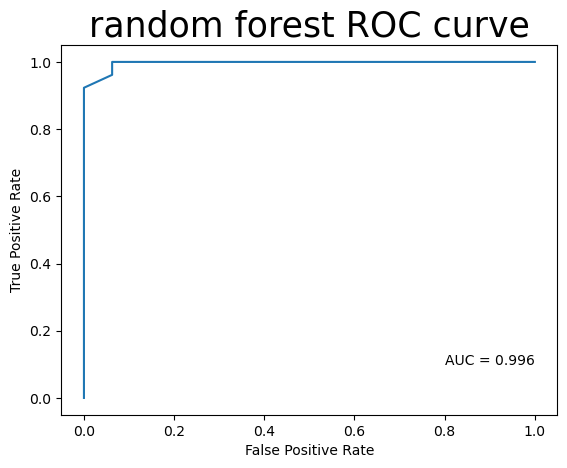

0.9963942307692308

In [98]:
from sklearn.metrics import roc_auc_score as AUC
from sklearn.metrics import roc_curve

FPR, recall, thresholds = roc_curve(test_target,model_rf.predict_proba(test_features)[:,1])
import seaborn as sns
sns.heatmap(confusion_matrix(test_target,test_predict),
           xticklabels=['B','M'],
           yticklabels=['B','M'])
plt.title('random forest confusion matrix',fontsize=20)
# 0.9696400000000001

# 画出ROC曲线

plt.figure()
plt.plot(FPR, recall)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('random forest ROC curve',fontsize=25)
plt.text(0.8,0.1, 'AUC = '+str('%.3f' % metrics.auc(FPR, recall)))    #文本中注释
plt.show()


from sklearn import metrics
metrics.auc(FPR, recall)

In [28]:
#svm
from sklearn.svm import SVC
svc_linear = SVC(kernel = "linear",max_iter=-1,probability=True)
svc_linear.fit(train_features, train_target)
test_predict = svc_linear.predict(test_features)
svc_linear.score(test_features,test_target)

0.9285714285714286

In [29]:
svc_linear.predict(test_features)
model_rf.predict(test_features)

rkf=RepeatedKFold(n_splits=10,n_repeats=10)
sum_score = 0

for train_index, test_index in rkf.split(features_lda):
    X_train =pd.DataFrame(features_lda).iloc[train_index]
    X_test =pd.DataFrame(features_lda).iloc[test_index]
    y_train =pd.DataFrame(target).iloc[train_index]
    y_test =pd.DataFrame(target).iloc[test_index]
    model_ = svc_linear.fit(X_train,y_train)
    score_=model_.score(X_test,y_test)
    sum_score+=score_
print('交叉')
print(sum_score/100)

交叉
0.9441758241758244


(8,)
(8,)
(8,)


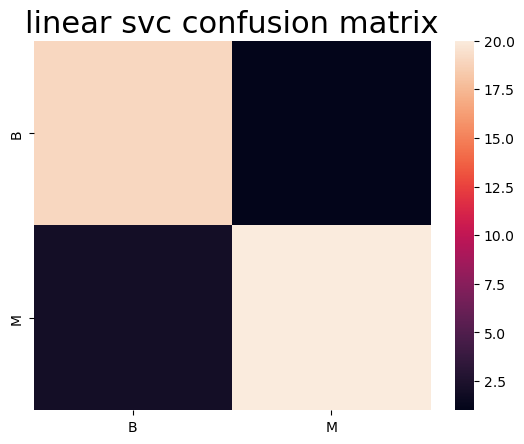

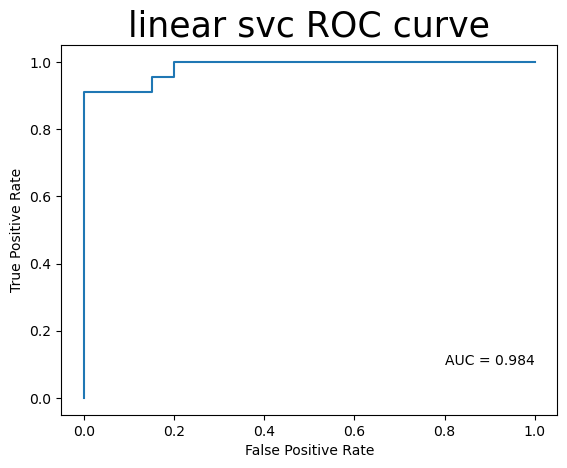

0.9840909090909091

In [30]:
from sklearn.metrics import roc_auc_score as AUC
from sklearn.metrics import roc_curve

FPR, recall, thresholds = roc_curve(test_target,svc_linear.decision_function(test_features), pos_label=1)
import seaborn as sns
sns.heatmap(confusion_matrix(test_target,test_predict),
           xticklabels=['B','M'],
           yticklabels=['B','M'])
plt.title('linear svc confusion matrix',fontsize=22)
print(FPR.shape)        # (45,))
print(recall.shape)     # (45,))
# 此时的threshold就不是一个概率值，而是距离值中的阈值了，所以它可以大于1，也可以为负
print(thresholds.shape) # (45,))

# area = AUC(test_features,svc_linear.decision_function(test_features))
# print(area)     # 0.9696400000000001

# 画出ROC曲线

plt.figure()
plt.plot(FPR, recall)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('linear svc ROC curve',fontsize=25)
plt.text(0.8,0.1, 'AUC = '+str('%.3f' % metrics.auc(FPR, recall)))    #文本中注释
plt.show()


from sklearn import metrics
metrics.auc(FPR, recall)

In [31]:
svc_rbf = SVC(kernel="rbf",degree=3,coef0=0)
svc_rbf.fit(train_features, train_target)
test_predict = svc_rbf.predict(test_features)
svc_rbf.score(test_features,test_target)

0.9285714285714286

In [32]:
svc_rbf.predict(test_features)

rkf=RepeatedKFold(n_splits=10,n_repeats=10)
sum_score = 0

for train_index, test_index in rkf.split(features_lda):
    X_train =pd.DataFrame(features_lda).iloc[train_index]
    X_test =pd.DataFrame(features_lda).iloc[test_index]
    y_train =pd.DataFrame(target).iloc[train_index]
    y_test =pd.DataFrame(target).iloc[test_index]
    model_ = svc_rbf.fit(X_train,y_train)
    score_=model_.score(X_test,y_test)
    sum_score+=score_
print('交叉')
print(sum_score/100)

交叉
0.9442857142857144


(8,)
(8,)


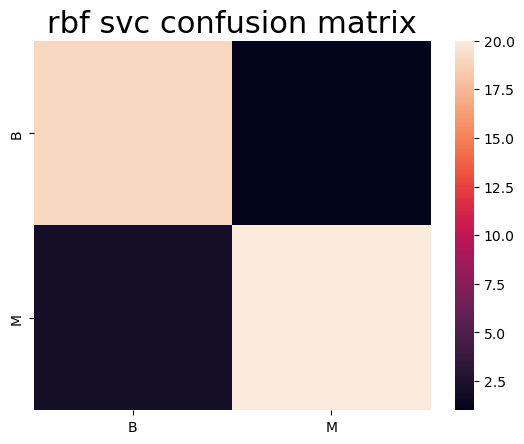

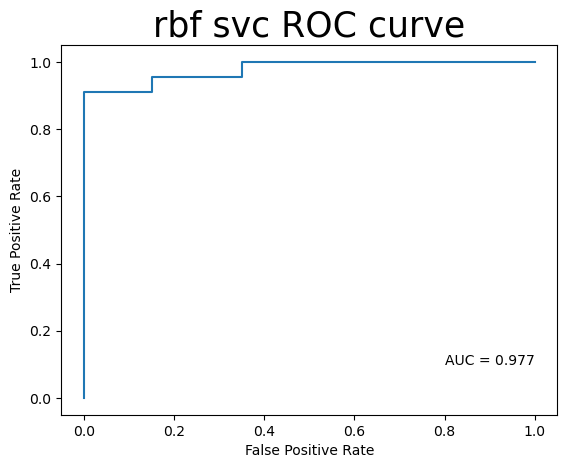

0.9772727272727273

In [33]:
from sklearn.metrics import roc_auc_score as AUC
from sklearn.metrics import roc_curve

FPR, recall, thresholds = roc_curve(test_target,svc_rbf.decision_function(test_features), pos_label=1)
import seaborn as sns
sns.heatmap(confusion_matrix(test_target,test_predict),
           xticklabels=['B','M'],
           yticklabels=['B','M'])
plt.title('rbf svc confusion matrix',fontsize=22)
print(FPR.shape)        # (45,))
print(recall.shape)     # (45,))

# 画出ROC曲线

plt.figure()
plt.plot(FPR, recall)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('rbf svc ROC curve',fontsize=25)
plt.text(0.8,0.1, 'AUC = '+str('%.3f' % metrics.auc(FPR, recall)))    #文本中注释
plt.show()


from sklearn import metrics
metrics.auc(FPR, recall)

In [34]:
svc_poly = SVC(kernel="poly",degree=3,coef0=0)
svc_poly.fit(train_features, train_target)
test_predict = svc_poly.predict(test_features)
svc_poly.score(test_features,test_target)

0.9047619047619048

In [35]:
svc_poly.predict(test_features)

rkf=RepeatedKFold(n_splits=10,n_repeats=10)
sum_score = 0

for train_index, test_index in rkf.split(features_lda):
    X_train =pd.DataFrame(features_lda).iloc[train_index]
    X_test =pd.DataFrame(features_lda).iloc[test_index]
    y_train =pd.DataFrame(target).iloc[train_index]
    y_test =pd.DataFrame(target).iloc[test_index]
    model_ = svc_poly.fit(X_train,y_train)
    score_=model_.score(X_test,y_test)
    sum_score+=score_
print('交叉')
print(sum_score/100)

交叉
0.8930219780219786


(8,)
(8,)


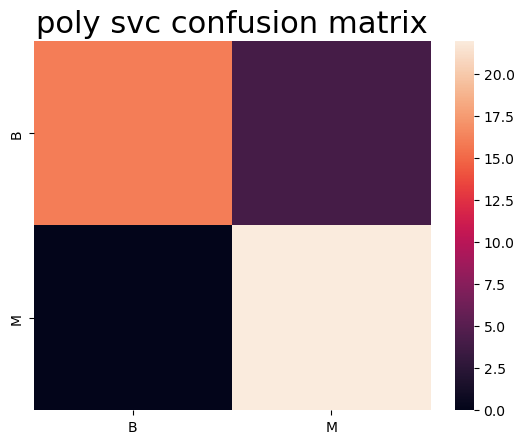

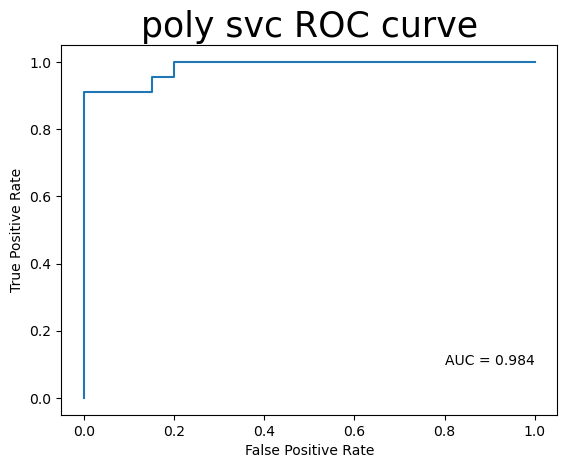

0.9840909090909091

In [36]:
from sklearn.metrics import roc_auc_score as AUC
from sklearn.metrics import roc_curve

FPR, recall, thresholds = roc_curve(test_target,svc_poly.decision_function(test_features), pos_label=1)
import seaborn as sns
sns.heatmap(confusion_matrix(test_target,test_predict),
           xticklabels=['B','M'],
           yticklabels=['B','M'])
plt.title('poly svc confusion matrix',fontsize=22)
print(FPR.shape)        # (45,))
print(recall.shape)     # (45,))

# 画出ROC曲线

plt.figure()
plt.plot(FPR, recall)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('poly svc ROC curve',fontsize=25)
plt.text(0.8,0.1, 'AUC = '+str('%.3f' % metrics.auc(FPR, recall)))    #文本中注释
plt.show()


from sklearn import metrics
metrics.auc(FPR, recall)

In [37]:
#集成算法
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

log_clf = LogisticRegression(penalty='l2',max_iter = 10000000,n_jobs=-1)
svc_linear = SVC(kernel = "linear",max_iter=-1)
svc_poly = SVC(kernel="poly",degree=3,coef0=0)
svc_rbf = SVC(kernel="rbf",degree=3,coef0=0)
tree_clf = DecisionTreeClassifier()

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('svc_l', svc_linear),('svc_p',svc_poly),('svc_r',svc_rbf)],
    voting='hard')
#, ('tree', tree_clf)
voting_clf.fit(train_features, train_target)

for clf in (log_clf, svc_linear,svc_poly,svc_rbf, voting_clf):
    clf.fit(train_features, train_target)
    print(clf.__class__.__name__, clf.score(test_features, test_target))


LogisticRegression 0.9047619047619048
SVC 0.9285714285714286
SVC 0.9047619047619048
SVC 0.9285714285714286
VotingClassifier 0.9285714285714286


In [38]:
voting_clf.predict(test_features)

rkf=RepeatedKFold(n_splits=10,n_repeats=10)
sum_score = 0

for train_index, test_index in rkf.split(features_lda):
    X_train =pd.DataFrame(features_lda).iloc[train_index]
    X_test =pd.DataFrame(features_lda).iloc[test_index]
    y_train =pd.DataFrame(target).iloc[train_index]
    y_test =pd.DataFrame(target).iloc[test_index]
    model_ = voting_clf.fit(X_train,y_train)
    score_=model_.score(X_test,y_test)
    sum_score+=score_
print('交叉')
print(sum_score/100)

交叉
0.9443406593406594


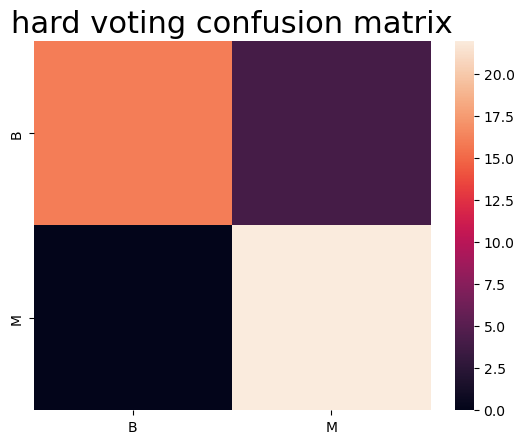

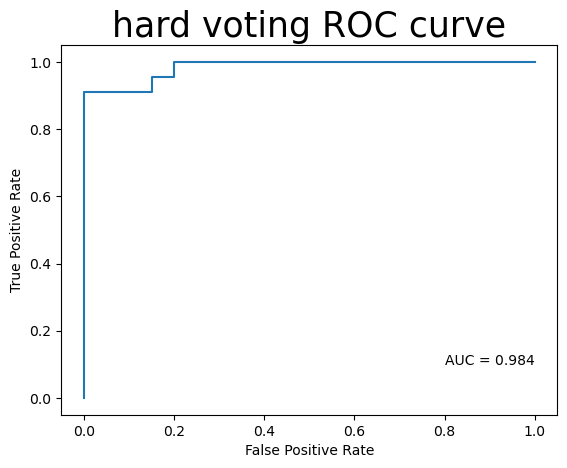

0.9840909090909091

In [39]:
from sklearn.metrics import roc_auc_score as AUC
from sklearn.metrics import roc_curve

# FPR, recall, thresholds = roc_curve(test_target,voting_clf.decision_function(test_features))
import seaborn as sns
sns.heatmap(confusion_matrix(test_target,test_predict),
           xticklabels=['B','M'],
           yticklabels=['B','M'])
plt.title('hard voting confusion matrix',fontsize=22)
# 0.9696400000000001

# 画出ROC曲线

plt.figure()
plt.plot(FPR, recall)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('hard voting ROC curve',fontsize=25)

plt.text(0.8,0.1, 'AUC = '+str('%.3f' % metrics.auc(FPR, recall)))    #文本中注释
plt.show()


from sklearn import metrics
metrics.auc(FPR, recall)

In [40]:
log_clf = LogisticRegression(penalty='l2',max_iter = 10000000,n_jobs=-1)
svc_linear = SVC(kernel = "linear",max_iter=-1,probability=True)
svc_poly = SVC(kernel="poly",degree=3,coef0=0,probability=True)
svc_rbf = SVC(kernel="rbf",degree=3,coef0=0,probability=True)
tree_clf = DecisionTreeClassifier()

voting_clf = VotingClassifier(
     estimators=[('lr', log_clf), ('svc_l', svc_linear),('svc_p',svc_poly),('svc_r',svc_rbf)],
    voting='soft')
#, ('tree', tree_clf)
voting_clf.fit(train_features, train_target)
for clf in (log_clf,  svc_linear,svc_poly,svc_rbf, voting_clf):
    clf.fit(train_features, train_target)
    print(clf.__class__.__name__, clf.score(test_features, test_target))

LogisticRegression 0.9047619047619048
SVC 0.9285714285714286
SVC 0.9047619047619048
SVC 0.9285714285714286
VotingClassifier 0.9047619047619048


In [41]:
voting_clf.predict(test_features)

rkf=RepeatedKFold(n_splits=10,n_repeats=10)
sum_score = 0

for train_index, test_index in rkf.split(features_lda):
    X_train =pd.DataFrame(features_lda).iloc[train_index]
    X_test =pd.DataFrame(features_lda).iloc[test_index]
    y_train =pd.DataFrame(target).iloc[train_index]
    y_test =pd.DataFrame(target).iloc[test_index]
    model_ = voting_clf.fit(X_train,y_train)
    score_=model_.score(X_test,y_test)
    sum_score+=score_
print('交叉')
print(sum_score/100)

交叉
0.9437912087912091


In [ ]:
from sklearn.metrics import roc_auc_score as AUC
from sklearn.metrics import roc_curve

FPR, recall, thresholds = roc_curve(test_target,voting_clf.predict_proba(test_features)[:,1])
import seaborn as sns
sns.heatmap(confusion_matrix(test_target,test_predict),
           xticklabels=['B','M'],
           yticklabels=['B','M'])
plt.title('soft voting confusion matrix',fontsize=22)
# 0.9696400000000001

# 画出ROC曲线

plt.figure()
plt.plot(FPR, recall)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('soft voting ROC curve',fontsize=25)

plt.text(0.8,0.1, 'AUC = '+str('%.3f' % metrics.auc(FPR, recall)))    #文本中注释
plt.show()


from sklearn import metrics
metrics.auc(FPR, recall)

In [ ]:
from sklearn.ensemble import StackingClassifier
log_clf = LogisticRegression(penalty='l2',max_iter = 10000000,n_jobs=-1)
svc_linear = SVC(kernel = "linear",max_iter=-1,probability=True)
svc_poly = SVC(kernel="poly",degree=3,coef0=0,probability=True)
svc_rbf = SVC(kernel="rbf",degree=3,coef0=0,probability=True)
tree_clf = DecisionTreeClassifier()

log_ensemble = LogisticRegression()

stk_clf = StackingClassifier(
      estimators=[('lr', log_clf), ('svc_l', svc_linear),
                  ('svc_p',svc_poly),('svc_r',svc_rbf),('tr',tree_clf)],
    final_estimator=log_ensemble)

stk_clf.fit(train_features, train_target)

stk_clf.score(test_features, test_target)

In [ ]:

rkf=RepeatedKFold(n_splits=10,n_repeats=10)
sum_score = 0

for train_index, test_index in rkf.split(features_lda):
    X_train =pd.DataFrame(features_lda).iloc[train_index]
    X_test =pd.DataFrame(features_lda).iloc[test_index]
    y_train =pd.DataFrame(target).iloc[train_index]
    y_test =pd.DataFrame(target).iloc[test_index]
    model_ = stk_clf.fit(X_train,y_train)
    score_=model_.score(X_test,y_test)
    sum_score+=score_
print('交叉')
print(sum_score/100)

In [ ]:
from sklearn.metrics import roc_auc_score as AUC
from sklearn.metrics import roc_curve

FPR, recall, thresholds = roc_curve(test_target,stk_clf.predict_proba(test_features)[:,1])
import seaborn as sns
sns.heatmap(confusion_matrix(test_target,test_predict),
           xticklabels=['B','M'],
           yticklabels=['B','M'])
plt.title('Stacking confusion matrix',fontsize=22)
# 0.9696400000000001

# 画出ROC曲线

plt.figure()
plt.plot(FPR, recall)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Stacking ROC curve',fontsize=25)

plt.text(0.8,0.1, 'AUC = '+str('%.3f' % metrics.auc(FPR, recall)))    #文本中注释
plt.show()


from sklearn import metrics
metrics.auc(FPR, recall)

In [ ]:
rkf=RepeatedKFold(n_splits=10,n_repeats=10)


log_clf = LogisticRegression(penalty='l2',max_iter = 10000000,n_jobs=-1)
svc_linear = SVC(kernel = "linear",max_iter=-1,probability=True)
svc_poly = SVC(kernel="poly",degree=3,coef0=0,probability=True)
svc_rbf = SVC(kernel="rbf",degree=3,coef0=0,probability=True)
tree_clf = DecisionTreeClassifier()

voting_clf = VotingClassifier(
     estimators=[('lr', log_clf), ('svc_l', svc_linear),('svc_p',svc_poly),('svc_r',svc_rbf)],
    voting='soft')
sum_score = 0

for train_index, test_index in rkf.split(features_lda):
    X_train =pd.DataFrame(features_lda).iloc[train_index]
    X_test =pd.DataFrame(features_lda).iloc[test_index]
    # print(train_index)
    # print(test_index)
    y_train =pd.DataFrame(target).iloc[train_index]
    y_test =pd.DataFrame(target).iloc[test_index]
    model_svm = voting_clf.fit(X_train,y_train)
    score_svm=model_svm.score(X_test,y_test)
    sum_score+=score_svm
    
print(sum_score/100)

In [ ]:
rkf=RepeatedKFold(n_splits=10,n_repeats=10)
sum_score = 0

for train_index, test_index in rkf.split(features_lda):
    X_train =pd.DataFrame(features_lda).iloc[train_index]
    X_test =pd.DataFrame(features_lda).iloc[test_index]
    y_train =pd.DataFrame(target).iloc[train_index]
    y_test =pd.DataFrame(target).iloc[test_index]
    model_ = voting_clf.fit(X_train,y_train)
    score_=model_.score(X_test,y_test)
    sum_score+=score_
    
print(sum_score/100)

In [ ]:
# from sklearn.decomposition import PCA

In [ ]:
# pca_95 = PCA(n_components=100)

In [ ]:
# features_95 = pca_95.fit_transform(features_SS)

In [ ]:
# features_95

In [ ]:
# train_features_full, test_features, train_target_full, test_target = train_test_split(
#     features_95, target, 
#     test_size = 0.15)
# print(train_features_full.shape)
# print(train_target_full.shape)
# print(test_features.shape)
# print(test_target.shape)
# train_features, validation_features, train_target, validation_target = train_test_split(
#     train_features_full, train_target_full, 
#     test_size = 0.15)
# print(train_features.shape)
# print(train_target.shape)
# print(validation_features.shape)
# print(validation_target.shape)
# print(test_features.shape)
# print(test_target.shape)

In [ ]:
# from tensorflow import keras
# input_  = keras.layers.Input(shape = train_features.shape[1:])
# hidden1 = keras.layers.Dense(10,activation='selu')(input_)
# hidden2 = keras.layers.Dense(5,activation='selu')(hidden1)
# concat = keras.layers.Concatenate()([input_, hidden2])
# output = keras.layers.Dense(1,activation='sigmoid')(concat)
# model_wide = keras.Model(inputs=[input_], outputs=[output])

In [ ]:
# model_wide.compile(loss = 'binary_crossentropy', metrics = 'accuracy', optimizer='rmsprop')

In [ ]:
# model_wide.fit(train_features, train_target, batch_size = 20, epochs=200,
#          validation_data=(validation_features, validation_target))

In [ ]:
# features_len = features_95.shape[1]

# features_len

In [ ]:
# train_features_A = train_features[:,:features_len//3]
# train_features_B = train_features[:,features_len//3:]

# validation_features_A = validation_features[:,:features_len//3]
# validation_features_B = validation_features[:,features_len//3:]
# train_features_B

In [ ]:
# input_A = keras.layers.Input(shape=[features_len//3], name="wide_input")
# input_B = keras.layers.Input(shape=[features_len-features_len//3], name="deep_input")
# hidden1_ = keras.layers.Dense(5, activation="selu")(input_B)
# hidden2_ = keras.layers.Dense(3, activation="selu")(hidden1_)
# concat_ = keras.layers.concatenate([input_A, hidden2_])
# output_ = keras.layers.Dense(1,activation='sigmoid')(concat_)
# model_combine = keras.Model(inputs=[input_A, input_B], outputs=[output_])

In [ ]:
# model_combine.compile(loss = 'binary_crossentropy', metrics = 'accuracy', optimizer='rmsprop')

In [ ]:
# model_combine.fit([train_features_A, train_features_B],train_target,batch_size = 20, epochs=150,
#                  validation_data=((validation_features_A,validation_features_B), validation_target))

In [ ]:
# tensorboard_cb = keras.callbacks.TensorBoard(log_dir='output/logs',histogram_freq=1,embeddings_freq=1)

In [ ]:
# model_combine.fit((train_features_A, train_features_B),train_target,batch_size = 20, epochs=200,
#                  validation_data=((validation_features_A,validation_features_B), validation_target),
#                   callbacks=tensorboard_cb)